In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
train=pd.read_csv('data_cleaned2',index_col=0)
X=train.drop('SeriousDlqin2yrs',axis=1)
y=train['SeriousDlqin2yrs']

# Logistic Regression

In [3]:
y.value_counts()

0    135646
1      9631
Name: SeriousDlqin2yrs, dtype: int64

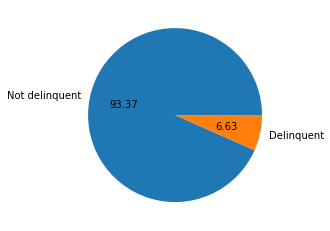

In [4]:
fig1,ax1=plt.subplots()
ax1.pie(y.value_counts(),autopct='%.2f',labels=['Not delinquent','Delinquent'])
plt.show()

In [5]:
# using original dataset

LR=LogisticRegression(random_state=0,max_iter=1000)
LR_scores=cross_val_score(LR,X,y,cv=10,scoring='roc_auc')
LR_scores.mean()

0.806397876265228

## Strategy 1: Oversampling

In [6]:
over_sample=RandomOverSampler(sampling_strategy=1)
X_res,y_res=over_sample.fit_resample(X,y)

In [7]:
y_res.value_counts()

1    135646
0    135646
Name: SeriousDlqin2yrs, dtype: int64

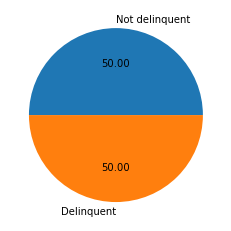

In [8]:
fig1,ax1=plt.subplots()
ax1.pie(y_res.value_counts(),autopct='%.2f',labels=['Not delinquent','Delinquent'])
plt.show()

In [9]:
# Using balanced dataset

LR=LogisticRegression(random_state=0,max_iter=1000)
LR_scores=cross_val_score(LR,X_res,y_res,cv=10,scoring='roc_auc')
LR_scores.mean()

0.8180890283791757

## Strategy 2: Reduce Multicollinearity

In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_info=pd.DataFrame()
vif_info['VIF']=[variance_inflation_factor(X_res.values,i) for i in range(X.shape[1])]
vif_info['Column']=X_res.columns
vif_info.sort_values('VIF',ascending=False)

,VIF,Column
5,4.419659,NumberOfOpenCreditLinesAndLoans
1,3.889399,age
7,2.091542,NumberRealEstateLoansOrLines
2,1.476989,NumberOfTime30-59DaysPastDueNotWorse
9,1.473594,NumberOfDependents
4,1.390787,MonthlyIncome
8,1.348810,NumberOfTime60-89DaysPastDueNotWorse
6,1.288309,NumberOfTimes90DaysLate
3,1.116956,DebtRatio
0,1.000803,RevolvingUtilizationOfUnsecuredLines


There are no VIF's higher than 5 meaning that none of our features have a really high multicollinearity. Therefore we don't have to remove features or modify any features in our model.

In [11]:
X_res.corr()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.006921,-0.006154,0.003281,0.002675,-0.008812,-0.002855,0.004165,-0.005521,-0.000682
age,-0.006921,1.000000,-0.062359,0.059650,0.057456,0.201426,-0.108503,0.093542,-0.080532,-0.184400
NumberOfTime30-59DaysPastDueNotWorse,-0.006154,-0.062359,1.000000,0.002930,-0.004712,0.096735,0.217294,0.051047,0.326818,0.073598
DebtRatio,0.003281,0.059650,0.002930,1.000000,0.006829,0.003874,-0.001083,0.033261,0.017573,-0.108060
MonthlyIncome,0.002675,0.057456,-0.004712,0.006829,1.000000,0.123623,-0.036691,0.166215,-0.021992,0.054826
NumberOfOpenCreditLinesAndLoans,-0.008812,0.201426,0.096735,0.003874,0.123623,1.000000,-0.165162,0.461362,-0.041978,0.043097
NumberOfTimes90DaysLate,-0.002855,-0.108503,0.217294,-0.001083,-0.036691,-0.165162,1.000000,-0.095360,0.309824,0.040841
NumberRealEstateLoansOrLines,0.004165,0.093542,0.051047,0.033261,0.166215,0.461362,-0.095360,1.000000,-0.027619,0.097369
NumberOfTime60-89DaysPastDueNotWorse,-0.005521,-0.080532,0.326818,0.017573,-0.021992,-0.041978,0.309824,-0.027619,1.000000,0.056370
NumberOfDependents,-0.000682,-0.184400,0.073598,-0.108060,0.054826,0.043097,0.040841,0.097369,0.056370,1.000000


There is a relatively high correlation between a person being 30-59 days late for a loan and a person being 60-89 days or more than 90 days late for a loan (0.32,0.2 correlation respectively)

In [12]:
train.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.002292,-0.113480,0.274589,-0.024225,-0.018541,-0.027198,0.315931,-0.006415,0.268507,0.049214
RevolvingUtilizationOfUnsecuredLines,-0.002292,1.000000,-0.008260,-0.002766,0.004566,0.004136,-0.013260,-0.001588,0.006333,-0.003473,0.004218
age,-0.113480,-0.008260,1.000000,-0.073488,0.042533,0.029101,0.143944,-0.083408,0.028603,-0.070902,-0.221057
NumberOfTime30-59DaysPastDueNotWorse,0.274589,-0.002766,-0.073488,1.000000,-0.013336,-0.000654,0.077312,0.217660,0.040762,0.305132,0.066642
DebtRatio,-0.024225,0.004566,0.042533,-0.013336,1.000000,-0.000805,0.006372,-0.011566,0.068377,-0.005502,-0.098467
MonthlyIncome,-0.018541,0.004136,0.029101,-0.000654,-0.000805,1.000000,0.091846,-0.019495,0.132920,-0.010949,0.063534
NumberOfOpenCreditLinesAndLoans,-0.027198,-0.013260,0.143944,0.077312,0.006372,0.091846,1.000000,-0.095672,0.428317,-0.022816,0.071209
NumberOfTimes90DaysLate,0.315931,-0.001588,-0.083408,0.217660,-0.011566,-0.019495,-0.095672,1.000000,-0.062827,0.294901,0.031856
NumberRealEstateLoansOrLines,-0.006415,0.006333,0.028603,0.040762,0.068377,0.132920,0.428317,-0.062827,1.000000,-0.020535,0.138995
NumberOfTime60-89DaysPastDueNotWorse,0.268507,-0.003473,-0.070902,0.305132,-0.005502,-0.010949,-0.022816,0.294901,-0.020535,1.000000,0.037495


## Strategy 3: Using Standard Scaler

In [46]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.77,45,2,0.80,9120.0,13,0,6,0,2.0
6185,0.16,45,0,1.19,6650.0,20,0,6,0,2.0
15458,0.04,45,0,1.01,5000.0,17,0,6,0,3.0
40153,0.15,45,0,0.59,32366.0,12,0,6,0,3.0
57864,0.22,45,0,0.50,13800.0,14,0,6,0,0.0


There is a problem with scale so a Standard Scaler might improve our model. 

In [51]:
ss=StandardScaler()
X_scaled = ss.fit_transform(X)
X_res_scaled=ss.fit_transform(X_res)

In [54]:
LR=LogisticRegression(random_state=0,max_iter=1000)
LR_scores=cross_val_score(LR,X_scaled,y,cv=10,scoring='roc_auc')
LR_scores.mean()

0.8164001062351472

## Using Balanced Data

In [55]:
LR=LogisticRegression(random_state=0,max_iter=1000)
LR_scores=cross_val_score(LR,X_res_scaled,y_res,cv=10,scoring='roc_auc')
LR_scores.mean()

0.8167488224386407

## Remove 'NumberOfTime30-59DaysPastDueNotWorse' and 'NumberOfTime60-89DaysPastDueNotWorse'

## 1. Using original data

In [13]:
X_new=X.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],axis=1)
X_new.shape

(145277, 8)

In [14]:
LR=LogisticRegression(random_state=0,max_iter=1000)
LR_scores=cross_val_score(LR,X_new,y,cv=10,scoring='roc_auc')
LR_scores.mean()

0.7383993209720157

## 2. Using resampled data

In [15]:
X_res_new=X_res.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],axis=1)
X_res_new.shape

(271292, 8)

In [16]:
LR=LogisticRegression(random_state=0,max_iter=1000)
LR_scores=cross_val_score(LR,X_res_new,y_res,cv=10,scoring='roc_auc')
LR_scores.mean()

0.7395119699422449

## Adding 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60 89DaysPastDueNotWorse' and 'NumberOfTimes90DaysLate' to one column

## 1. Using original data

In [17]:
X_modified=X.copy()

In [18]:
X_modified.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [21]:
X_modified['NumberofTimeOver30DayLate']=X_modified['NumberOfTime30-59DaysPastDueNotWorse']+ X_modified['NumberOfTime60-89DaysPastDueNotWorse']
+ X_modified['NumberOfTimes90DaysLate']
X_modified=X_modified.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate'],axis=1)

In [23]:
LR=LogisticRegression(random_state=0,max_iter=1000)
LR_scores=cross_val_score(LR,X_modified,y,cv=10,scoring='roc_auc')
LR_scores.mean()

0.771429931996767

## Using resampled data

In [24]:
X_res_modified=X_res.copy()

In [26]:
X_res_modified['NumberofTimeOver30DayLate']=X_res_modified['NumberOfTime30-59DaysPastDueNotWorse']+ X_res_modified['NumberOfTime60-89DaysPastDueNotWorse']
+ X_res_modified['NumberOfTimes90DaysLate']
X_res_modified=X_res_modified.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate'],axis=1)

In [27]:
LR=LogisticRegression(random_state=0,max_iter=1000)
LR_scores=cross_val_score(LR,X_res_modified,y_res,cv=10,scoring='roc_auc')
LR_scores.mean()

0.7756956812483637

## Create new feature from subtracting NumberOfTime30-59DaysPastDueNotWorse by NumberOfTime60-89DaysPastDueNotWorse

In [28]:
train.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.002292,-0.113480,0.274589,-0.024225,-0.018541,-0.027198,0.315931,-0.006415,0.268507,0.049214
RevolvingUtilizationOfUnsecuredLines,-0.002292,1.000000,-0.008260,-0.002766,0.004566,0.004136,-0.013260,-0.001588,0.006333,-0.003473,0.004218
age,-0.113480,-0.008260,1.000000,-0.073488,0.042533,0.029101,0.143944,-0.083408,0.028603,-0.070902,-0.221057
NumberOfTime30-59DaysPastDueNotWorse,0.274589,-0.002766,-0.073488,1.000000,-0.013336,-0.000654,0.077312,0.217660,0.040762,0.305132,0.066642
DebtRatio,-0.024225,0.004566,0.042533,-0.013336,1.000000,-0.000805,0.006372,-0.011566,0.068377,-0.005502,-0.098467
MonthlyIncome,-0.018541,0.004136,0.029101,-0.000654,-0.000805,1.000000,0.091846,-0.019495,0.132920,-0.010949,0.063534
NumberOfOpenCreditLinesAndLoans,-0.027198,-0.013260,0.143944,0.077312,0.006372,0.091846,1.000000,-0.095672,0.428317,-0.022816,0.071209
NumberOfTimes90DaysLate,0.315931,-0.001588,-0.083408,0.217660,-0.011566,-0.019495,-0.095672,1.000000,-0.062827,0.294901,0.031856
NumberRealEstateLoansOrLines,-0.006415,0.006333,0.028603,0.040762,0.068377,0.132920,0.428317,-0.062827,1.000000,-0.020535,0.138995
NumberOfTime60-89DaysPastDueNotWorse,0.268507,-0.003473,-0.070902,0.305132,-0.005502,-0.010949,-0.022816,0.294901,-0.020535,1.000000,0.037495


In [29]:
train['NumberOfTime30-59DaysPastDueNotWorse'].mean()

0.2455860184337507

In [30]:
train['NumberOfTime60-89DaysPastDueNotWorse'].mean()

0.06539231949998968

In [31]:
train['NumberOfTimes90DaysLate'].mean()

0.09174886595951183

## 1. Using original data

In [32]:
X_minus=X.copy()

In [33]:
X_minus['30-59Days60-89DaysDiff']=X_minus['NumberOfTime30-59DaysPastDueNotWorse']-X_minus['NumberOfTime60-89DaysPastDueNotWorse']
X_minus=X_minus.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],axis=1)

In [34]:
LR=LogisticRegression(random_state=0,max_iter=1000)
LR_scores=cross_val_score(LR,X_minus,y,cv=10,scoring='roc_auc')
LR_scores.mean()

0.7611843808356344

## 2. Using resampled data

In [35]:
X_res_minus=X_res.copy()

In [36]:
X_res_minus['30-59Days60-89DaysDiff']=X_res_minus['NumberOfTime30-59DaysPastDueNotWorse']-X_res_minus['NumberOfTime60-89DaysPastDueNotWorse']
X_res_minus=X_res_minus.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],axis=1)

In [37]:
LR=LogisticRegression(random_state=0,max_iter=1000)
LR_scores=cross_val_score(LR,X_res_minus,y_res,cv=10,scoring='roc_auc')
LR_scores.mean()

0.7674570357897791

Overall, for the original data, the scaled_data performed the best. The oversampled data without any further modfifications performed the best overall with a score of 81.8

## Feature Importance

In [56]:
LR=LogisticRegression(random_state=0,max_iter=1000)
LR.fit(X_scaled,y)

LogisticRegression(max_iter=1000, random_state=0)

In [58]:
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': LR.coef_[0]})
importances=importances.sort_values(by='Importance',ascending=False)

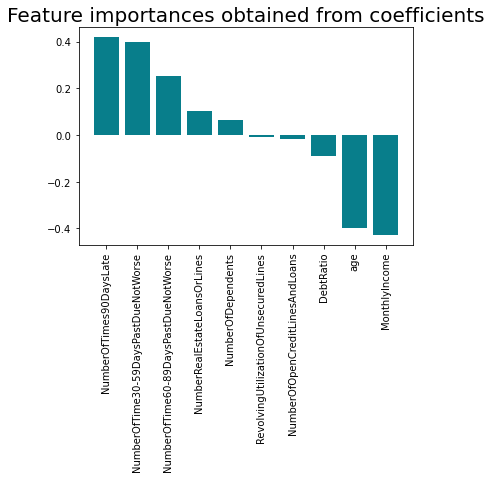

In [61]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Random Forest

In [38]:
RF=RandomForestClassifier(random_state=0)
RF_scores=cross_val_score(RF,X,y,cv=10,scoring='roc_auc')
RF_scores.mean()

0.8004778143421568

In [65]:
RF=RandomForestClassifier(random_state=0)
RF_scores=cross_val_score(RF,X_scaled,y,cv=10,scoring='roc_auc')
RF_scores.mean()

0.8004030348113422

## Using balanced data

In [39]:
RF=RandomForestClassifier(random_state=0)
RF_scores=cross_val_score(RF,X_res,y_res,cv=10,scoring='roc_auc')
RF_scores.mean()

0.9982219508146406

This really high score could be due to overfitting because of the oversampling of the minority class data points.

## Feature importance

In [40]:
RF.fit(X,y)

RandomForestClassifier(random_state=0)

In [41]:
RF_feature_importance=RF.feature_importances_
feature_names=list(X.columns)

Text(0.5, 0, 'Random Forest Feature Importance')

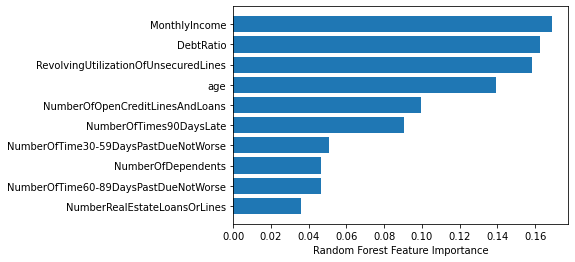

In [45]:
sorted_idx=RF.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx],RF.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importance')

# Hyper parameter tuning with GridSearchCV

## Logistic Regression

In [97]:
param_grid=[{'penalty':['l1','l2','elasticnet'],
             'C': np.logspace(-4, 4, 20),
             'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
            }]

In [98]:
LR=LogisticRegression(random_state=0,max_iter=1000)
log_clf= GridSearchCV(LR,param_grid=param_grid,cv=5,verbose=True, n_jobs=-1)

In [99]:
best_log_clf= log_clf.fit(X_scaled,y)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/Users/felixinoue/opt/anaconda3/envs/smartpay/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
800 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/felixinoue/opt/anaconda3/envs/smartpay/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/felixinoue/opt/anaconda3/envs/smartpay/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/felixinoue/opt/anaconda3/env

In [100]:
best_log_clf.best_estimator_

LogisticRegression(C=0.00026366508987303583, max_iter=1000, random_state=0,
                   solver='liblinear')

Best estimators: LogisticRegression(C=0.00026366508987303583, max_iter=1000, random_state=0,
                   solver='liblinear')

In [101]:
best_log_clf.best_score_

0.9368998465427486

## Submission

In [102]:
test=pd.read_csv('data/cs-test.csv',index_col=0)
X_test=test.drop('SeriousDlqin2yrs',axis=1)
X_test=X_test.dropna()
X_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [135]:
# Normalizing X_test
ss=StandardScaler()
X_test_scaled = ss.fit_transform(X_test)

In [141]:
best_log_classifier = LogisticRegression(C= 0.00026366508987303583, penalty= 'l2', solver= 'liblinear')
best_log_classifier.fit(X_scaled,y)

predict_proba = best_log_classifier.predict_proba(X_test_scaled)

In [142]:
predict_proba

array([[0.88939259, 0.11060741],
       [0.89501729, 0.10498271],
       [0.90127127, 0.09872873],
       ...,
       [0.86749954, 0.13250046],
       [0.842597  , 0.157403  ],
       [0.87689835, 0.12310165]])

In [149]:
predict_proba_class1=[y[1].round(2) for y in predict_proba]
X_test['PredictProbability']=predict_proba_class1
X_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,PredictProbability,Prediction
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,0.11,0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,0.10,0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,0.10,0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,0.13,0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,0.13,0


In [150]:
predictions=best_log_classifier.predict(X_test_scaled)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [151]:
X_test['Prediction']=predictions
X_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,PredictProbability,Prediction
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,0.11,0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,0.10,0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,0.10,0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0,0.13,0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0,0.13,0


In [153]:
X_test.to_csv('Submission.csv')